In [1]:
msfile = 'ngc3621.ms'
prefix='ngc3621'
target='NGC3621'
g_cal='1117-248'
b_cal='0408-65'
f_cal='0408-65'
#ref_ant='m018'
ref_ant='m003'

### [Optional] W correction

In [2]:
fixvis(vis=msfile, outputvis=prefix+'_fixvis.ms')

True

Show log 2020-03-24 15:11:42	INFO	fixvis::::	
 2020-03-24 15:11:42	INFO	fixvis::::+	##########################################
 2020-03-24 15:11:42	INFO	fixvis::::+	##### Begin Task: fixvis #####
 2020-03-24 15:11:42	INFO	fixvis::::	fixvis(vis="ngc3621.ms",outputvis="ngc3621_fixvis.ms",field="",refcode="",reuse=True,
 2020-03-24 15:11:42	INFO	fixvis::::+ phasecenter="",distances="",datacolumn="all")
 2020-03-24 15:11:42	INFO	fixvis::::	Copying original MS to outputvis ...
 2020-03-24 15:11:42	INFO	fixvis::::	Will leave phase centers unchanged.
 2020-03-24 15:11:42	INFO	fixvis::::	Recalculating the UVW coordinates ...
 2020-03-24 15:11:42	INFO	Imager::open() Opening MeasurementSet /home/jupyter/MeerKAT-Cookbook/casa/ngc3621_fixvis.ms
 2020-03-24 15:11:42	INFO	SubMS::parseColumnNames()	Using DATA CORRECTED_DATA columns.
 2020-03-24 15:11:42	INFO	FixVis::setFields	Selecting fields 0 1 2 
 2020-03-24 15:11:42	INFO	FixVis::calc_uvw	The UVWs are already in the desired frame - leaving them as is.
 2020-03-24 15:11:43	INFO	fixvis::::	CASA Version 5.5.0-149 
 2020-03-24 15:11:43	INFO	fixvis::::	
 2020-03-24 15:11:43	INFO	fixvis::::	##### End Task: fixvis #####
 2020-03-24 15:11:43	INFO	fixvis::::+	##########################################

In [3]:
msfile = prefix+'_fixvis.ms'
prefix = prefix+'_fixvis'
print(msfile)
print(prefix)

ngc3621_fixvis.ms
ngc3621_fixvis


### Basics calibration steps

In [4]:
clearcal(msfile)

Show log 2020-03-24 15:11:52	INFO	clearcal::::	
 2020-03-24 15:11:52	INFO	clearcal::::+	##########################################
 2020-03-24 15:11:52	INFO	clearcal::::+	##### Begin Task: clearcal #####
 2020-03-24 15:11:52	INFO	clearcal::::	clearcal(vis="ngc3621_fixvis.ms",field="",spw="",intent="",addmodel=False)
 2020-03-24 15:11:52	WARN	clearcal::calibrater::setvi(bool,bool)	Forcing use of OLD VisibilityIterator.
 2020-03-24 15:11:52	INFO	clearcal::calibrater::open	****Using OLD VI-driven calibrater tool****
 2020-03-24 15:11:52	INFO	clearcal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:11:52	INFO	clearcal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:11:52	INFO	clearcal::calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:11:52	INFO	clearcal::calibrater::reset	Reseting solve/apply state
 2020-03-24 15:11:52	INFO	clearcal::Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:11:52	INFO	clearcal::Calibrater::selectvis	Selection did not drop any rows
 2020-03-24 15:11:52	INFO	clearcal::Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:11:52	INFO	clearcal::calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-03-24 15:11:52	INFO	clearcal::::	Clearing all model records in MS header.
 2020-03-24 15:11:52	INFO	clearcal:::: 0408-65 (id = 0) deleted.
 2020-03-24 15:11:52	INFO	clearcal::calibrater::initcalset	Beginning initcalset------------------------
 2020-03-24 15:11:52	INFO	clearcal::VisSet::VisSet	Initializing CORRECTED_DATA (to DATA)
 2020-03-24 15:11:52	INFO	clearcal::VisSet::VisSet	Initialized 15687 rows.
 2020-03-24 15:11:52	INFO	clearcal::::	CASA Version 5.5.0-149 
 2020-03-24 15:11:52	INFO	clearcal::::	
 2020-03-24 15:11:52	INFO	clearcal::::	##### End Task: clearcal #####
 2020-03-24 15:11:52	INFO	clearcal::::+	##########################################

### Convert correlation coefficients to absolute flux densities

In [5]:
log_S = -0.9790 + 3.3662*np.log10(1284.) -1.1216*np.log10(1284.)**2 + 0.0861*np.log10(1284.)**3
setjy(vis=msfile, field=f_cal, scalebychan=True, standard='manual', fluxdensity=[10**log_S,0,0,0])

{'0': {'0': {'fluxd': array([ 17.10634985,   0.        ,   0.        ,   0.        ])},
  'fieldName': '0408-65'},
 'format': "{field Id: {spw Id: {fluxd: [I,Q,U,V] in Jy}, 'fieldName':field name }}"}

Show log 2020-03-24 15:11:56	INFO	setjy::::	
 2020-03-24 15:11:56	INFO	setjy::::+	##########################################
 2020-03-24 15:11:56	INFO	setjy::::+	##### Begin Task: setjy #####
 2020-03-24 15:11:56	INFO	setjy::::	setjy(vis="ngc3621_fixvis.ms",field="0408-65",spw="",selectdata=False,timerange="",
 2020-03-24 15:11:56	INFO	setjy::::+ scan="",intent="",observation="",scalebychan=True,standard="manual",
 2020-03-24 15:11:56	INFO	setjy::::+ model="",modimage="",listmodels=False,fluxdensity=[17.106349850349627, 0, 0, 0],spix=0.0,
 2020-03-24 15:11:56	INFO	setjy::::+ reffreq="1GHz",polindex=[],polangle=[],rotmeas=0.0,fluxdict={},
 2020-03-24 15:11:56	INFO	setjy::::+ useephemdir=False,interpolation="nearest",usescratch=False,ismms=False)
 2020-03-24 15:11:56	INFO	setjy::::	{'field': '0408-65'}
 2020-03-24 15:11:56	INFO	Imager::open() Opening MeasurementSet /home/jupyter/MeerKAT-Cookbook/casa/ngc3621_fixvis.ms
 2020-03-24 15:11:56	INFO	setjy::::	CASA Version 5.5.0-149 
 2020-03-24 15:11:56	INFO	setjy::::	
 2020-03-24 15:11:56	INFO	imager::setjy()	The applied flux density does not depend on frequency.
 2020-03-24 15:11:56	INFO	imager::data selection	Selected 3129 out of 15687 rows.
 2020-03-24 15:11:56	SEVERE	MeasTable::dUTC(Double) (file /usr/local/casa/casacore/measures/Measures/MeasTable.cc, line 4290)	Leap second table TAI_UTC seems out-of-date.
 2020-03-24 15:11:56	SEVERE	MeasTable::dUTC(Double) (file /usr/local/casa/casacore/measures/Measures/MeasTable.cc, line 4290)+	Until the table is updated (see the CASA documentation or your system admin),
 2020-03-24 15:11:56	SEVERE	MeasTable::dUTC(Double) (file /usr/local/casa/casacore/measures/Measures/MeasTable.cc, line 4290)+	times and coordinates derived from UTC could be wrong by 1s or more.
 2020-03-24 15:11:56	INFO	imager::setjy()	Will clear any existing model with matching field=0408-65 and spw=*
 2020-03-24 15:11:56	INFO Clearing model records in MS header for selected fields.
 2020-03-24 15:11:56	INFO 0408-65 (id = 0) not found.
 2020-03-24 15:11:56	INFO	imager::data selection	Selected 3129 out of 15687 rows.
 2020-03-24 15:11:56	INFO	imager::ft() Fourier transforming: replacing visibility model header
 2020-03-24 15:11:56	INFO	imager::createSkyEquation() Processing after subtracting componentlist /home/jupyter/MeerKAT-Cookbook/casa/ngc3621_fixvis.ms_setjy_spw0_0408-65_1GHz57851.6d.cl
 2020-03-24 15:11:56	INFO	imager::createFTMachine() Performing interferometric gridding...
 2020-03-24 15:11:57	INFO	setjy::::	##### End Task: setjy #####
 2020-03-24 15:11:57	INFO	setjy::::+	##########################################

### Delay calibration using the flux cal
Delays after calibration should be no more than a few nanoseconds

In [6]:
ktable = prefix + '.K'

In [7]:
rmtables(ktable)

Show log 2020-03-24 15:13:35	INFO	rmtables::::	
 2020-03-24 15:13:35	INFO	rmtables::::+	##########################################
 2020-03-24 15:13:35	INFO	rmtables::::+	##### Begin Task: rmtables #####
 2020-03-24 15:13:35	INFO	rmtables::::	rmtables(tablenames="ngc3621_fixvis.K")
 2020-03-24 15:13:35	WARN	rmtables::utils::removetable	Empty filename
 2020-03-24 15:13:35	WARN	rmtables::utils::removetable	Cannot delete file because it's not a table.
 2020-03-24 15:13:35	INFO	rmtables::::	##### End Task: rmtables #####
 2020-03-24 15:13:35	INFO	rmtables::::+	##########################################

In [8]:
gaincal(vis=msfile,
        caltable=ktable,
        field=f_cal,
        gaintype='K',
        solint='inf',
        refant=ref_ant,
        combine='scan',
        solnorm=False,
        minsnr=3.0,
        gaintable=[])

Show log 2020-03-24 15:13:38	INFO	gaincal::::	
 2020-03-24 15:13:38	INFO	gaincal::::+	##########################################
 2020-03-24 15:13:38	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2020-03-24 15:13:38	INFO	gaincal::::	gaincal(vis="ngc3621_fixvis.ms",caltable="ngc3621_fixvis.K",field="0408-65",spw="",intent="",
 2020-03-24 15:13:38	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2020-03-24 15:13:38	INFO	gaincal::::+ observation="",msselect="",solint="inf",combine="scan",preavg=-1.0,
 2020-03-24 15:13:38	INFO	gaincal::::+ refant="m003",refantmode="flex",minblperant=4,minsnr=3.0,solnorm=False,
 2020-03-24 15:13:38	INFO	gaincal::::+ normtype="mean",gaintype="K",smodel=[],calmode="ap",solmode="",
 2020-03-24 15:13:38	INFO	gaincal::::+ rmsthresh=[],append=False,splinetime=3600.0,npointaver=3,phasewrap=180.0,
 2020-03-24 15:13:38	INFO	gaincal::::+ docallib=False,callib="",gaintable=[],gainfield=[''],interp=[],
 2020-03-24 15:13:38	INFO	gaincal::::+ spwmap=[],parang=False)
 2020-03-24 15:13:38	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:13:38	INFO	gaincal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:13:38	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:13:38	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2020-03-24 15:13:38	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:13:38	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:13:38	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:13:38	INFO	Calibrater::selectvis+ Selecting on field: '0408-65'
 2020-03-24 15:13:38	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2020-03-24 15:13:38	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 2235
 2020-03-24 15:13:38	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:13:38	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2020-03-24 15:13:38	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-03-24 15:13:38	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-03-24 15:13:38	INFO	Calibrater::setsolve	. K Jones: table=ngc3621_fixvis.K append=false solint=inf refantmode='flex' refant='m003' minsnr=3 apmode=AP solnorm=false
 2020-03-24 15:13:38	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-03-24 15:13:38	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-03-24 15:13:38	INFO	Calibrater::solve	. (None)
 2020-03-24 15:13:38	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020-03-24 15:13:38	INFO	Calibrater::solve	. K Jones: table=ngc3621_fixvis.K append=false solint=inf refantmode='flex' refant='m003' minsnr=3 apmode=AP solnorm=false
 2020-03-24 15:13:38	INFO	Calibrater::solve	For solint = inf, found 1 solution intervals.
 2020-03-24 15:13:39	INFO	Calibrater::solve Found good K Jones solutions in 1 solution intervals.
 2020-03-24 15:13:39	INFO Writing solutions to table: ngc3621_fixvis.K
 2020-03-24 15:13:39	INFO	calibrater::solve	Finished solving.
 2020-03-24 15:13:39	INFO	gaincal::::	Calibration solve statistics per spw: (expected/attempted/succeeded):
 2020-03-24 15:13:39	INFO	gaincal:::: Spw 0: 1/1/1
 2020-03-24 15:13:39	INFO	gaincal::::	##### End Task: gaincal #####
 2020-03-24 15:13:39	INFO	gaincal::::+	##########################################

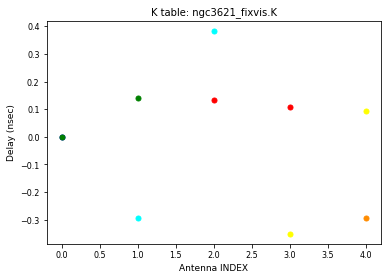

Show log 2020-03-24 15:13:52	INFO	plotcal::::	
 2020-03-24 15:13:52	INFO	plotcal::::+	##########################################
 2020-03-24 15:13:52	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-03-24 15:13:52	INFO	plotcal::::	plotcal(caltable="ngc3621_fixvis.K",xaxis="antenna",yaxis="delay",poln="",field="",
 2020-03-24 15:13:52	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-03-24 15:13:52	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[],showflags=False,plotsymbol="o",
 2020-03-24 15:13:52	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-03-24 15:13:52	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-03-24 15:13:52	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-03-24 15:13:52	INFO Now get the data
 2020-03-24 15:13:52	INFO Done Processing data ... 
 2020-03-24 15:13:52	INFO	plotcal::::	##### End Task: plotcal #####
 2020-03-24 15:13:52	INFO	plotcal::::+	##########################################

In [10]:
plotcal(caltable=ktable,
        xaxis='antenna',
        yaxis='delay')

### Through away calibration using the flux cal
To stabilize time varying components, do a basic phase calibration

In [11]:
gtable0 = prefix + '.G0'

In [12]:
rmtables(gtable0)

Show log 2020-03-24 15:13:58	INFO	rmtables::::	
 2020-03-24 15:13:58	INFO	rmtables::::+	##########################################
 2020-03-24 15:13:58	INFO	rmtables::::+	##### Begin Task: rmtables #####
 2020-03-24 15:13:58	INFO	rmtables::::	rmtables(tablenames="ngc3621_fixvis.G0")
 2020-03-24 15:13:58	WARN	rmtables::utils::removetable	Empty filename
 2020-03-24 15:13:58	WARN	rmtables::utils::removetable	Cannot delete file because it's not a table.
 2020-03-24 15:13:58	INFO	rmtables::::	##### End Task: rmtables #####
 2020-03-24 15:13:58	INFO	rmtables::::+	##########################################

In [13]:
gaincal(vis=msfile,
        caltable=gtable0,
        field=f_cal,
        solint='int',
        refant=ref_ant,
        gaintype='G',
        solnorm=True,
        calmode='p',
        minsnr=3.0,
        gaintable=[ktable])

Show log 2020-03-24 15:13:59	INFO	gaincal::::	
 2020-03-24 15:13:59	INFO	gaincal::::+	##########################################
 2020-03-24 15:13:59	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2020-03-24 15:13:59	INFO	gaincal::::	gaincal(vis="ngc3621_fixvis.ms",caltable="ngc3621_fixvis.G0",field="0408-65",spw="",intent="",
 2020-03-24 15:13:59	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2020-03-24 15:13:59	INFO	gaincal::::+ observation="",msselect="",solint="int",combine="",preavg=-1.0,
 2020-03-24 15:13:59	INFO	gaincal::::+ refant="m003",refantmode="flex",minblperant=4,minsnr=3.0,solnorm=True,
 2020-03-24 15:13:59	INFO	gaincal::::+ normtype="mean",gaintype="G",smodel=[],calmode="p",solmode="",
 2020-03-24 15:13:59	INFO	gaincal::::+ rmsthresh=[],append=False,splinetime=3600.0,npointaver=3,phasewrap=180.0,
 2020-03-24 15:13:59	INFO	gaincal::::+ docallib=False,callib="",gaintable=['ngc3621_fixvis.K'],gainfield=[''],interp=[],
 2020-03-24 15:13:59	INFO	gaincal::::+ spwmap=[],parang=False)
 2020-03-24 15:13:59	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:13:59	INFO	gaincal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:13:59	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:13:59	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2020-03-24 15:13:59	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:13:59	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:13:59	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:13:59	INFO	Calibrater::selectvis+ Selecting on field: '0408-65'
 2020-03-24 15:13:59	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2020-03-24 15:13:59	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 2235
 2020-03-24 15:13:59	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:13:59	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2020-03-24 15:13:59	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:14:00	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:14:00	INFO (K Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-03-24 15:14:00	INFO	Calibrater::setapply(type, applypar)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:14:00	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-03-24 15:14:00	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-03-24 15:14:00	INFO	Calibrater::setsolve	. G Jones: table=ngc3621_fixvis.G0 append=false solint=int refantmode='flex' refant='m003' minsnr=3 apmode=P solnorm=true normtype=MEAN
 2020-03-24 15:14:00	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-03-24 15:14:00	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-03-24 15:14:00	INFO	Calibrater::solve	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:14:00	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020-03-24 15:14:00	INFO	Calibrater::solve	. G Jones: table=ngc3621_fixvis.G0 append=false solint=int refantmode='flex' refant='m003' minsnr=3 apmode=P solnorm=true normtype=MEAN
 2020-03-24 15:14:00	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2020-03-24 15:14:00	INFO	Calibrater::solve	For solint = int, found 149 solution intervals.
 2020-03-24 15:14:01	INFO	Calibrater::solve Found good G Jones solutions in 149 solution intervals.
 2020-03-24 15:14:01	INFO Applying refant: m003 refantmode = flex (hold alternate refants' phase constant) when refant flagged
 2020-03-24 15:14:01	INFO Enforcing apmode on solutions.
 2

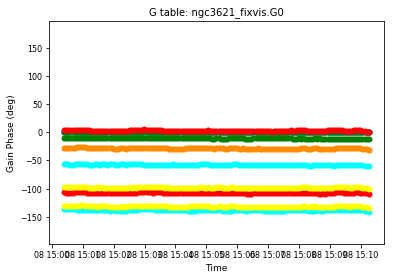

Show log 2020-03-24 15:14:03	INFO	plotcal::::	
 2020-03-24 15:14:03	INFO	plotcal::::+	##########################################
 2020-03-24 15:14:03	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-03-24 15:14:03	INFO	plotcal::::	plotcal(caltable="ngc3621_fixvis.G0",xaxis="time",yaxis="phase",poln="",field="",
 2020-03-24 15:14:03	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-03-24 15:14:03	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[-1, -1, -180, 180],showflags=False,plotsymbol="o",
 2020-03-24 15:14:03	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-03-24 15:14:03	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-03-24 15:14:03	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-03-24 15:14:03	INFO Now get the data
 2020-03-24 15:14:03	INFO Done Processing data ... 
 2020-03-24 15:14:03	INFO	plotcal::::	##### End Task: plotcal #####
 2020-03-24 15:14:03	INFO	plotcal::::+	##########################################

In [14]:
plotcal(caltable=gtable0,
        xaxis='time',
        yaxis='phase',
        plotrange = [-1, -1, -180, 180])

### Solve for bandpass response using the flux cal

In [15]:
btable = prefix + '.B'

In [16]:
rmtables(btable)

Show log 2020-03-24 15:14:13	INFO	rmtables::::	
 2020-03-24 15:14:13	INFO	rmtables::::+	##########################################
 2020-03-24 15:14:13	INFO	rmtables::::+	##### Begin Task: rmtables #####
 2020-03-24 15:14:13	INFO	rmtables::::	rmtables(tablenames="ngc3621_fixvis.B")
 2020-03-24 15:14:13	WARN	rmtables::utils::removetable	Empty filename
 2020-03-24 15:14:13	WARN	rmtables::utils::removetable	Cannot delete file because it's not a table.
 2020-03-24 15:14:13	INFO	rmtables::::	##### End Task: rmtables #####
 2020-03-24 15:14:13	INFO	rmtables::::+	##########################################

In [17]:
bandpass(vis=msfile,
         caltable=btable,
         field=b_cal,
         refant=ref_ant,
         solnorm=True,
         combine='scan',
         solint='inf',
         bandtype='B',
         minsnr=3.0,
         gaintable=[gtable0, ktable])

Show log 2020-03-24 15:14:16	INFO	bandpass::::	
 2020-03-24 15:14:16	INFO	bandpass::::+	##########################################
 2020-03-24 15:14:16	INFO	bandpass::::+	##### Begin Task: bandpass #####
 2020-03-24 15:14:16	INFO	bandpass::::	bandpass(vis="ngc3621_fixvis.ms",caltable="ngc3621_fixvis.B",field="0408-65",spw="",intent="",
 2020-03-24 15:14:16	INFO	bandpass::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2020-03-24 15:14:16	INFO	bandpass::::+ observation="",msselect="",solint="inf",combine="scan",refant="m003",
 2020-03-24 15:14:16	INFO	bandpass::::+ minblperant=4,minsnr=3.0,solnorm=True,bandtype="B",smodel=[],
 2020-03-24 15:14:16	INFO	bandpass::::+ append=False,fillgaps=0,degamp=3,degphase=3,visnorm=False,
 2020-03-24 15:14:16	INFO	bandpass::::+ maskcenter=0,maskedge=5,docallib=False,callib="",gaintable=['ngc3621_fixvis.G0', 'ngc3621_fixvis.K'],
 2020-03-24 15:14:16	INFO	bandpass::::+ gainfield=[''],interp=[],spwmap=[],parang=False)
 2020-03-24 15:14:16	INFO	bandpass::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:14:16	INFO	bandpass::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:14:16	INFO	bandpass::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:14:16	INFO	bandpass::calibrater::reset	Reseting solve/apply state
 2020-03-24 15:14:16	INFO	bandpass::::	NB: bandpass automatically excludes auto-correlations.
 2020-03-24 15:14:16	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:14:16	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:14:16	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:14:16	INFO	Calibrater::selectvis+ Selecting on field: '0408-65'
 2020-03-24 15:14:16	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2020-03-24 15:14:16	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 2235
 2020-03-24 15:14:16	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:14:16	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2020-03-24 15:14:16	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:14:16	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:14:16	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=ngc3621_fixvis.G0 select= interp=linear spwmap=[-1] calWt=true
 2020-03-24 15:14:16	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:14:16	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:14:16	INFO (K Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-03-24 15:14:16	INFO	Calibrater::setapply(type, applypar)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:14:16	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-03-24 15:14:16	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-03-24 15:14:16	INFO	Calibrater::setsolve	. B Jones: table=ngc3621_fixvis.B append=false solint=inf,none refantmode='flex' refant='m003' minsnr=3 apmode=AP solnorm=true normtype=MEAN
 2020-03-24 15:14:16	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-03-24 15:14:16	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-03-24 15:14:16	INFO	Calibrater::solve	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:14:16	INFO	Calibrater::solve	. G Jones: table=ngc3621_fixvis.G0 select= interp=linear spwmap=[-1] calWt=true
 2020-03-24 15:14:16	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020-03-24 15:14:16	INFO	Calibrater::solve	. B Jones: table=ngc3621_fixvis.B append=false solint=inf,none refantmode='flex' refant='m003' minsnr=3 apmode=AP solnorm=tru

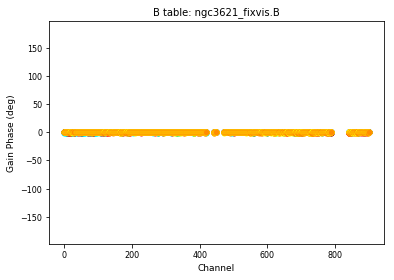

Show log 2020-03-24 15:14:22	INFO	plotcal::::	
 2020-03-24 15:14:22	INFO	plotcal::::+	##########################################
 2020-03-24 15:14:22	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-03-24 15:14:22	INFO	plotcal::::	plotcal(caltable="ngc3621_fixvis.B",xaxis="chan",yaxis="phase",poln="",field="0408-65",
 2020-03-24 15:14:22	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-03-24 15:14:22	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[-1, -1, -180, 180],showflags=False,plotsymbol="o",
 2020-03-24 15:14:22	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-03-24 15:14:22	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-03-24 15:14:22	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-03-24 15:14:22	INFO Now get the data
 2020-03-24 15:14:22	INFO Done Processing data ... 
 2020-03-24 15:15:10	INFO	plotcal::::	##### End Task: plotcal #####
 2020-03-24 15:15:10	INFO	plotcal::::+	##########################################

In [18]:
plotcal(caltable=btable,
        xaxis='chan',
        yaxis='phase',
        field=b_cal,
        plotrange = [-1, -1, -180, 180])

### Complex gain calibration

In [19]:
gtable = prefix + '.G'

In [20]:
rmtables(gtable)

Show log 2020-03-24 15:15:23	INFO	rmtables::::	
 2020-03-24 15:15:23	INFO	rmtables::::+	##########################################
 2020-03-24 15:15:23	INFO	rmtables::::+	##### Begin Task: rmtables #####
 2020-03-24 15:15:23	INFO	rmtables::::	rmtables(tablenames="ngc3621_fixvis.G")
 2020-03-24 15:15:23	WARN	rmtables::utils::removetable	Empty filename
 2020-03-24 15:15:23	WARN	rmtables::utils::removetable	Cannot delete file because it's not a table.
 2020-03-24 15:15:23	INFO	rmtables::::	##### End Task: rmtables #####
 2020-03-24 15:15:23	INFO	rmtables::::+	##########################################

In [21]:
gaincal(vis=msfile,
        caltable=gtable,
        field=f_cal,
        solint='int',
        refant=ref_ant,
        combine='spw',
        gaintype='G',
        calmode='ap',
        minsnr=1.0,
        solnorm=False,
        gaintable=[btable, ktable])

Show log 2020-03-24 15:15:29	INFO	gaincal::::	
 2020-03-24 15:15:29	INFO	gaincal::::+	##########################################
 2020-03-24 15:15:29	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2020-03-24 15:15:29	INFO	gaincal::::	gaincal(vis="ngc3621_fixvis.ms",caltable="ngc3621_fixvis.G",field="0408-65",spw="",intent="",
 2020-03-24 15:15:29	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2020-03-24 15:15:29	INFO	gaincal::::+ observation="",msselect="",solint="int",combine="spw",preavg=-1.0,
 2020-03-24 15:15:29	INFO	gaincal::::+ refant="m003",refantmode="flex",minblperant=4,minsnr=1.0,solnorm=False,
 2020-03-24 15:15:29	INFO	gaincal::::+ normtype="mean",gaintype="G",smodel=[],calmode="ap",solmode="",
 2020-03-24 15:15:29	INFO	gaincal::::+ rmsthresh=[],append=False,splinetime=3600.0,npointaver=3,phasewrap=180.0,
 2020-03-24 15:15:29	INFO	gaincal::::+ docallib=False,callib="",gaintable=['ngc3621_fixvis.B', 'ngc3621_fixvis.K'],gainfield=[''],interp=[],
 2020-03-24 15:15:29	INFO	gaincal::::+ spwmap=[],parang=False)
 2020-03-24 15:15:29	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:15:29	INFO	gaincal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:15:29	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:15:29	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2020-03-24 15:15:29	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:15:29	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:15:29	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:15:29	INFO	Calibrater::selectvis+ Selecting on field: '0408-65'
 2020-03-24 15:15:29	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2020-03-24 15:15:29	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 2235
 2020-03-24 15:15:29	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:15:29	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2020-03-24 15:15:29	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:29	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:29	INFO	Calibrater::setapply(type, applypar)	. B Jones: table=ngc3621_fixvis.B select= interp=linear,linear spwmap=[-1] calWt=true
 2020-03-24 15:15:29	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:29	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:29	INFO (K Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-03-24 15:15:29	INFO	Calibrater::setapply(type, applypar)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:29	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-03-24 15:15:29	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-03-24 15:15:29	INFO	Calibrater::setsolve	. G Jones: table=ngc3621_fixvis.G append=false solint=int refantmode='flex' refant='m003' minsnr=1 apmode=AP solnorm=false
 2020-03-24 15:15:29	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-03-24 15:15:29	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-03-24 15:15:29	INFO	Calibrater::solve	. B Jones: table=ngc3621_fixvis.B select= interp=linear,linear spwmap=[-1] calWt=true
 2020-03-24 15:15:29	INFO	Calibrater::solve	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:29	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020-03-24 15:15:29	INFO	Calibrater::solve	. G Jones: table=ngc3621_fixvis.G append=false solint=int refantmode='flex' refant='m003' minsnr=1 apmode=AP solnorm=false
 2020-

In [22]:
gaincal(vis=msfile,
        caltable=gtable,
        field=g_cal,
        solint='int',
        refant=ref_ant,
        combine='spw',
        gaintype='G',
        calmode='ap',
        minsnr=1.0,
        solnorm=False,
        append=True,
        gaintable=[btable, ktable])

Show log 2020-03-24 15:15:32	INFO	gaincal::::	
 2020-03-24 15:15:32	INFO	gaincal::::+	##########################################
 2020-03-24 15:15:32	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2020-03-24 15:15:32	INFO	gaincal::::	gaincal(vis="ngc3621_fixvis.ms",caltable="ngc3621_fixvis.G",field="1117-248",spw="",intent="",
 2020-03-24 15:15:32	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2020-03-24 15:15:32	INFO	gaincal::::+ observation="",msselect="",solint="int",combine="spw",preavg=-1.0,
 2020-03-24 15:15:32	INFO	gaincal::::+ refant="m003",refantmode="flex",minblperant=4,minsnr=1.0,solnorm=False,
 2020-03-24 15:15:32	INFO	gaincal::::+ normtype="mean",gaintype="G",smodel=[],calmode="ap",solmode="",
 2020-03-24 15:15:32	INFO	gaincal::::+ rmsthresh=[],append=True,splinetime=3600.0,npointaver=3,phasewrap=180.0,
 2020-03-24 15:15:32	INFO	gaincal::::+ docallib=False,callib="",gaintable=['ngc3621_fixvis.B', 'ngc3621_fixvis.K'],gainfield=[''],interp=[],
 2020-03-24 15:15:32	INFO	gaincal::::+ spwmap=[],parang=False)
 2020-03-24 15:15:32	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:15:32	INFO	gaincal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:15:32	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:15:32	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2020-03-24 15:15:32	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:15:32	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:15:32	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:15:32	INFO	Calibrater::selectvis+ Selecting on field: '1117-248'
 2020-03-24 15:15:32	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2020-03-24 15:15:32	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 2220
 2020-03-24 15:15:32	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:15:32	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2020-03-24 15:15:32	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:32	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:32	INFO	Calibrater::setapply(type, applypar)	. B Jones: table=ngc3621_fixvis.B select= interp=linear,linear spwmap=[-1] calWt=true
 2020-03-24 15:15:32	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:32	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:32	INFO (K Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-03-24 15:15:32	INFO	Calibrater::setapply(type, applypar)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:32	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-03-24 15:15:32	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-03-24 15:15:32	INFO	Calibrater::setsolve	. G Jones: table=ngc3621_fixvis.G append=true solint=int refantmode='flex' refant='m003' minsnr=1 apmode=AP solnorm=false
 2020-03-24 15:15:32	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-03-24 15:15:32	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-03-24 15:15:32	INFO	Calibrater::solve	. B Jones: table=ngc3621_fixvis.B select= interp=linear,linear spwmap=[-1] calWt=true
 2020-03-24 15:15:32	INFO	Calibrater::solve	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:32	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020-03-24 15:15:32	INFO	Calibrater::solve	. G Jones: table=ngc3621_fixvis.G append=true solint=int refantmode='flex' refant='m003' minsnr=1 apmode=AP solnorm=false
 2020-0

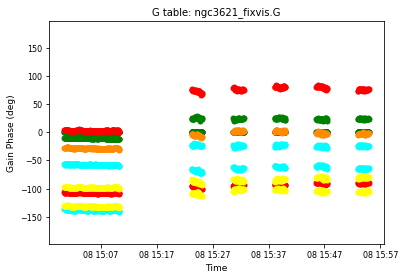

Show log 2020-03-24 15:15:36	INFO	plotcal::::	
 2020-03-24 15:15:36	INFO	plotcal::::+	##########################################
 2020-03-24 15:15:36	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-03-24 15:15:36	INFO	plotcal::::	plotcal(caltable="ngc3621_fixvis.G",xaxis="time",yaxis="phase",poln="",field="0408-65,1117-248",
 2020-03-24 15:15:36	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-03-24 15:15:36	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[-1, -1, -180, 180],showflags=False,plotsymbol="o",
 2020-03-24 15:15:36	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-03-24 15:15:36	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-03-24 15:15:36	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-03-24 15:15:36	INFO Now get the data
 2020-03-24 15:15:36	INFO Done Processing data ... 
 2020-03-24 15:15:36	INFO	plotcal::::	##### End Task: plotcal #####
 2020-03-24 15:15:36	INFO	plotcal::::+	##########################################

In [23]:
plotcal(caltable=gtable,
        xaxis='time',
        yaxis='phase',
        field=f_cal+','+g_cal,
        plotrange=[-1, -1, -180, 180])

### Flux calibration

In [24]:
ftable = prefix + '.flux'

In [25]:
rmtables(ftable)

Show log 2020-03-24 15:15:45	INFO	rmtables::::	
 2020-03-24 15:15:45	INFO	rmtables::::+	##########################################
 2020-03-24 15:15:45	INFO	rmtables::::+	##### Begin Task: rmtables #####
 2020-03-24 15:15:45	INFO	rmtables::::	rmtables(tablenames="ngc3621_fixvis.flux")
 2020-03-24 15:15:45	WARN	rmtables::utils::removetable	Empty filename
 2020-03-24 15:15:45	WARN	rmtables::utils::removetable	Cannot delete file because it's not a table.
 2020-03-24 15:15:45	INFO	rmtables::::	##### End Task: rmtables #####
 2020-03-24 15:15:45	INFO	rmtables::::+	##########################################

In [26]:
fluxscale(vis=msfile,
          caltable=gtable,
          fluxtable=ftable,
          reference=f_cal,
          transfer=g_cal)

{'2': {'0': {'fluxd': array([ 1.96640635,  0.        ,  0.        ,  0.        ]),
   'fluxdErr': array([ 0.04938857,  0.        ,  0.        ,  0.        ]),
   'numSol': array([ 10.,   0.,   0.,   0.])},
  'covarMat': array([], shape=(0, 0), dtype=float64),
  'fieldName': '1117-248',
  'fitFluxd': 0.0,
  'fitFluxdErr': 0.0,
  'fitRefFreq': 0.0,
  'spidx': array([ 0.,  0.]),
  'spidxerr': array([ 0.,  0.])},
 'freq': array([  1.41110168e+09]),
 'spwID': array([0], dtype=int32),
 'spwName': array(['none'],
       dtype='|S5')}

Show log 2020-03-24 15:15:47	INFO	fluxscale::::	
 2020-03-24 15:15:47	INFO	fluxscale::::+	##########################################
 2020-03-24 15:15:47	INFO	fluxscale::::+	##### Begin Task: fluxscale #####
 2020-03-24 15:15:47	INFO	fluxscale::::	fluxscale(vis="ngc3621_fixvis.ms",caltable="ngc3621_fixvis.G",fluxtable="ngc3621_fixvis.flux",reference="0408-65",transfer="1117-248",
 2020-03-24 15:15:47	INFO	fluxscale::::+ listfile="",append=False,refspwmap=[-1],gainthreshold=-1.0,antenna="",
 2020-03-24 15:15:47	INFO	fluxscale::::+ timerange="",scan="",incremental=False,fitorder=1,display=False)
 2020-03-24 15:15:47	INFO	fluxscale::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:15:47	INFO	fluxscale::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:15:47	INFO	fluxscale::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:15:47	INFO	fluxscale::calibrater::fluxscale	Beginning fluxscale--(MSSelection version)-------
 2020-03-24 15:15:47	INFO	fluxscale:::: Found reference field(s): 0408-65
 2020-03-24 15:15:47	INFO	fluxscale:::: Found transfer field(s): 1117-248
 2020-03-24 15:15:47	INFO	fluxscale:::: Flux density for 1117-248 in SpW=0 (freq=1.4111e+09 Hz) is: 1.96641 +/- 0.0493886 (SNR = 39.815, N = 10)
 2020-03-24 15:15:47	INFO	fluxscale::Calibrater::fluxscale	Storing result in ngc3621_fixvis.flux
 2020-03-24 15:15:47	INFO	fluxscale::::	Writing solutions to table: ngc3621_fixvis.flux
 2020-03-24 15:15:47	INFO	fluxscale::::	CASA Version 5.5.0-149 
 2020-03-24 15:15:47	INFO	fluxscale::::	
 2020-03-24 15:15:47	INFO	fluxscale::::	##### End Task: fluxscale #####
 2020-03-24 15:15:47	INFO	fluxscale::::+	##########################################

### Apply calibration separately to each source

In [27]:
applycal(vis=msfile,
         field=f_cal,
         gaintable=[ftable, btable, ktable],
         gainfield=[f_cal, f_cal, f_cal],
         interp=['', 'nearest', ''],
         calwt=False,
         applymode='calflag')

Show log 2020-03-24 15:15:53	INFO	applycal::::	
 2020-03-24 15:15:53	INFO	applycal::::+	##########################################
 2020-03-24 15:15:53	INFO	applycal::::+	##### Begin Task: applycal #####
 2020-03-24 15:15:53	INFO	applycal::::	applycal(vis="ngc3621_fixvis.ms",field="0408-65",spw="",intent="",selectdata=True,
 2020-03-24 15:15:53	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2020-03-24 15:15:53	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['ngc3621_fixvis.flux', 'ngc3621_fixvis.B', 'ngc3621_fixvis.K'],gainfield=['0408-65', '0408-65', '0408-65'],
 2020-03-24 15:15:53	INFO	applycal::::+ interp=['', 'nearest', ''],spwmap=[],calwt=False,parang=False,applymode="calflag",
 2020-03-24 15:15:53	INFO	applycal::::+ flagbackup=True)
 2020-03-24 15:15:53	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:15:53	INFO	applycal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:15:53	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:15:53	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2020-03-24 15:15:53	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_1
 2020-03-24 15:15:53	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:15:53	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:15:53	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:15:53	INFO	Calibrater::selectvis+ Selecting on field: '0408-65'
 2020-03-24 15:15:53	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 3129
 2020-03-24 15:15:53	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:15:53	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-03-24 15:15:53	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:53	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:53	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=ngc3621_fixvis.flux select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:53	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:53	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:53	INFO	Calibrater::setapply(type, applypar)	. B Jones: table=ngc3621_fixvis.B select= interp=nearest,linear spwmap=[-1] calWt=false
 2020-03-24 15:15:53	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:15:53	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:15:53	INFO	Calibrater::setapply(type, applypar)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:53	INFO	calibrater::correct	Beginning correct---------------------------
 2020-03-24 15:15:53	INFO	Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2020-03-24 15:15:53	INFO	Calibrater::correct2 (VI2/VB2)	. B Jones: table=ngc3621_fixvis.B select= interp=nearest,linear spwmap=[-1] calWt=false
 2020-03-24 15:15:53	INFO	Calibrater::correct2 (VI2/VB2)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:53	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=ngc3621_fixvis.flux select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:15:54	INFO	calibrater::correct	Finished correcting.
 2020-03-24 15:15:54	INFO	applycal::::	Calibration apply flagging statistics (among calibrateable spws):
 2020-03-24 15:15:54	INFO	applycal:::: Total visibilities selected for correction (ncorr x nchan x nrow summed over spws) = 5632200
 2020-03-24 15:15:54	INFO	applycal:::: Flags:
 2020-03-24 15:15:54	INFO	applycal:::: B Jones: In: 3242240 / 5632200 (57.5661375661%) --> Out: 3242240 / 563

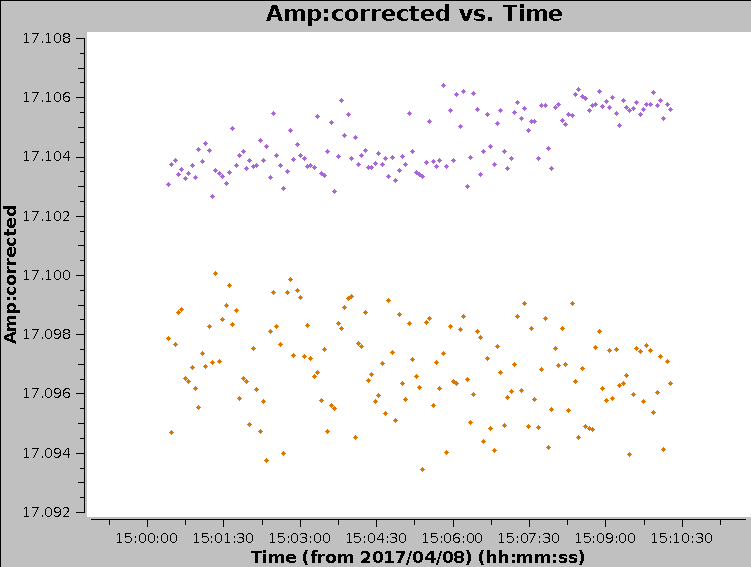

True

Show log 2020-03-24 15:16:05	INFO	plotms::::	
 2020-03-24 15:16:05	INFO	plotms::::+	##########################################
 2020-03-24 15:16:05	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-03-24 15:16:05	INFO	plotms::::	plotms(vis="ngc3621_fixvis.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-03-24 15:16:05	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2020-03-24 15:16:05	INFO	plotms::::+ yaxis="amp",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-03-24 15:16:05	INFO	plotms::::+ selectdata=True,field="0408-65",spw="",timerange="",uvrange="",
 2020-03-24 15:16:05	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2020-03-24 15:16:05	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="4096",
 2020-03-24 15:16:05	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=True,avgantenna=False,
 2020-03-24 15:16:05	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-03-24 15:16:05	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-03-24 15:16:05	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-03-24 15:16:05	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-03-24 15:16:05	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-03-24 15:16:05	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-03-24 15:16:05	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-03-24 15:16:05	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-03-24 15:16:05	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-03-24 15:16:05	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-03-24 15:16:05	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-03-24 15:16:05	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-03-24 15:16:05	INFO	plotms::::+ showatm=False,showtsky=False)
 2020-03-24 15:16:07	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-03-24 15:16:07	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	START Current memory usage: 2292.42 kilobytes.
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	Plot Data Transformations:
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ Frame = 
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ VelDef = RADIO
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ formStokes = false
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	Data Averaging: 
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ Channel: 4096 channels
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ All Baselines: true
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	Plot Data Calibration:
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ Use Calibration = 0
 2020-03-24 15:16:07	INFO	PlotMS::load_cache+ Calibration Library = 
 2020-03-24 15:16:07	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):corrected 

In [28]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       ydatacolumn='corrected',
       correlation='XX,YY',
       field=f_cal,
       coloraxis='corr',
       averagedata=True,
       avgbaseline=True,
       avgchannel='4096')

In [29]:
applycal(vis=msfile,
         field=g_cal,
         gaintable=[ftable, btable, ktable],
         gainfield=[g_cal, b_cal, f_cal],
         interp=['', 'nearest', ''],
         calwt=False,
         applymode='calflag')

Show log 2020-03-24 15:16:15	INFO	applycal::::	
 2020-03-24 15:16:15	INFO	applycal::::+	##########################################
 2020-03-24 15:16:15	INFO	applycal::::+	##### Begin Task: applycal #####
 2020-03-24 15:16:15	INFO	applycal::::	applycal(vis="ngc3621_fixvis.ms",field="1117-248",spw="",intent="",selectdata=True,
 2020-03-24 15:16:15	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2020-03-24 15:16:15	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['ngc3621_fixvis.flux', 'ngc3621_fixvis.B', 'ngc3621_fixvis.K'],gainfield=['1117-248', '0408-65', '0408-65'],
 2020-03-24 15:16:15	INFO	applycal::::+ interp=['', 'nearest', ''],spwmap=[],calwt=False,parang=False,applymode="calflag",
 2020-03-24 15:16:15	INFO	applycal::::+ flagbackup=True)
 2020-03-24 15:16:15	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-03-24 15:16:15	INFO	applycal::calibrater::open	Opening MS: ngc3621_fixvis.ms for calibration.
 2020-03-24 15:16:15	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-24 15:16:15	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2020-03-24 15:16:15	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_2
 2020-03-24 15:16:15	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-24 15:16:15	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-24 15:16:15	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-24 15:16:15	INFO	Calibrater::selectvis+ Selecting on field: '1117-248'
 2020-03-24 15:16:15	INFO	Calibrater::selectvis	By selection 15687 rows are reduced to 3108
 2020-03-24 15:16:15	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-03-24 15:16:15	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-03-24 15:16:15	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:16:15	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:16:15	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=ngc3621_fixvis.flux select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:16:15	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:16:15	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:16:15	INFO	Calibrater::setapply(type, applypar)	. B Jones: table=ngc3621_fixvis.B select= interp=nearest,linear spwmap=[-1] calWt=false
 2020-03-24 15:16:15	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-03-24 15:16:15	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-03-24 15:16:15	INFO	Calibrater::setapply(type, applypar)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:16:15	INFO	calibrater::correct	Beginning correct---------------------------
 2020-03-24 15:16:15	INFO	Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2020-03-24 15:16:15	INFO	Calibrater::correct2 (VI2/VB2)	. B Jones: table=ngc3621_fixvis.B select= interp=nearest,linear spwmap=[-1] calWt=false
 2020-03-24 15:16:15	INFO	Calibrater::correct2 (VI2/VB2)	. K Jones: table=ngc3621_fixvis.K select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:16:15	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=ngc3621_fixvis.flux select= interp=linear spwmap=[-1] calWt=false
 2020-03-24 15:16:15	INFO	calibrater::correct	Finished correcting.
 2020-03-24 15:16:15	INFO	applycal::::	Calibration apply flagging statistics (among calibrateable spws):
 2020-03-24 15:16:15	INFO	applycal:::: Total visibilities selected for correction (ncorr x nchan x nrow summed over spws) = 5594400
 2020-03-24 15:16:15	INFO	applycal:::: Flags:
 2020-03-24 15:16:15	INFO	applycal:::: B Jones: In: 3220480 / 5594400 (57.5661375661%) --> Out: 3220480 / 

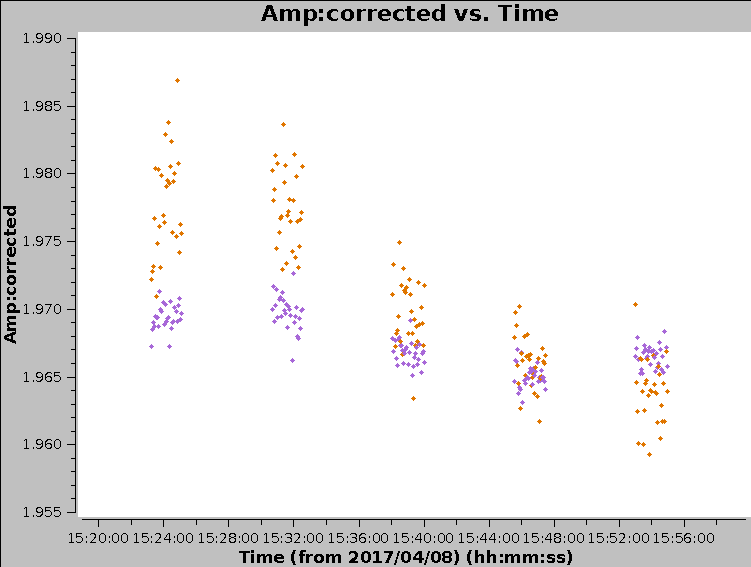

True

Show log 2020-03-24 15:16:18	INFO	plotms::::	
 2020-03-24 15:16:18	INFO	plotms::::+	##########################################
 2020-03-24 15:16:18	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-03-24 15:16:18	INFO	plotms::::	plotms(vis="ngc3621_fixvis.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-03-24 15:16:18	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2020-03-24 15:16:18	INFO	plotms::::+ yaxis="amp",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-03-24 15:16:18	INFO	plotms::::+ selectdata=True,field="1117-248",spw="",timerange="",uvrange="",
 2020-03-24 15:16:18	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2020-03-24 15:16:18	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="4096",
 2020-03-24 15:16:18	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=True,avgantenna=False,
 2020-03-24 15:16:18	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-03-24 15:16:18	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-03-24 15:16:18	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-03-24 15:16:18	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-03-24 15:16:18	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-03-24 15:16:18	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-03-24 15:16:18	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-03-24 15:16:18	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-03-24 15:16:18	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-03-24 15:16:18	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-03-24 15:16:18	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-03-24 15:16:18	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-03-24 15:16:18	INFO	plotms::::+ showatm=False,showtsky=False)
 2020-03-24 15:16:18	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	START Current memory usage: 10649.6 kilobytes.
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Plot Data Transformations:
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ Frame = 
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ VelDef = RADIO
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ formStokes = false
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Data Averaging: 
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ Channel: 4096 channels
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ All Baselines: true
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Plot Data Calibration:
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ Use Calibration = 0
 2020-03-24 15:16:18	INFO	PlotMS::load_cache+ Calibration Library = 
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):corrected vs. Time(2)...
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Loading page header cache
 2020-03-24 15:16:18	INFO	PlotMS::load_cache	Data selection will yield a total of 6216 plottable points (flagged and unflagged).
 2020-03-24 15

In [30]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       ydatacolumn='corrected',
       correlation='XX,YY',
       field=g_cal,
       coloraxis='corr',
       averagedata=True,
       avgbaseline=True,
       avgchannel='4096')